# Project 6 Custom EDA
Beth Spornitz
September 23, 2024

This code uses a combination of Python and Markdown to create an initial data story in a Jupyter Notebook. The project includes a project virtual environment with popular libraries for data analytics including pandas, matplotlib, and seaborn, and introduces a common process for starting exploratory data analysis projects.

Specific to the titanic dataset, this file will walk through how to perform these functions:
1.  Data Acquisition
2.  Initial Data Inspection
3.  Initial Descriptive Statistics
4.  Initial Data Distribution for Numerical Columns
5.  Initial Data Distribution for Categorical Columns
6.  Initial Data Preparation (or Data Preprocessing)
7.  Initial Visualizations
8.  Initial Storytelling and Presentation

These steps will be followed by visulations and explanations of visualizations.

### Import Dependencies

In [227]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

### Data Acquisition

In [228]:
# Load the Titanic dataset into DataFrame
df = sns.load_dataset('titanic')

# Inspect first rows of the DataFrame
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


### Initial Data Inspection

In [229]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

### Initial Descriptive Statistics

In [230]:
print(df.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


### Initial Data Distribution for Numerical Columns

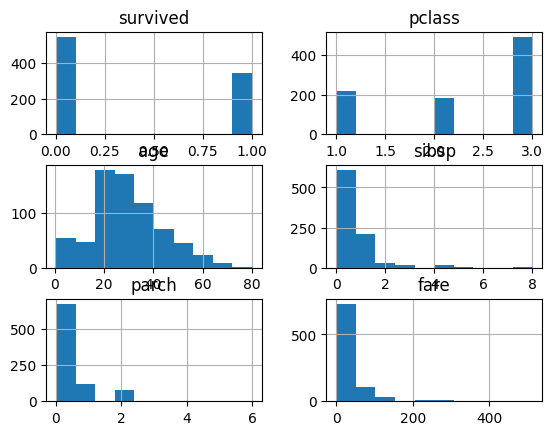

In [231]:
# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

##### Observation

Unique values in survived: 2


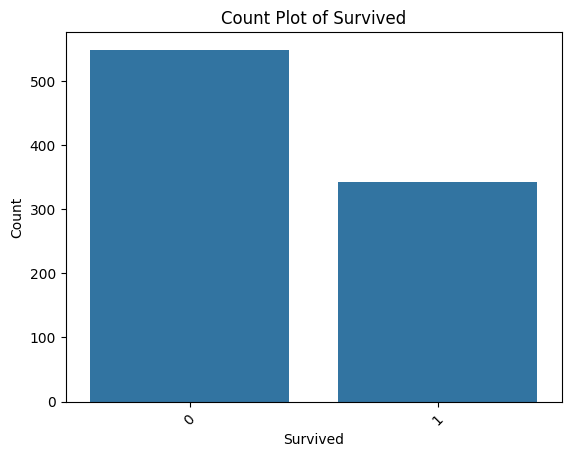

Unique values in pclass: 3


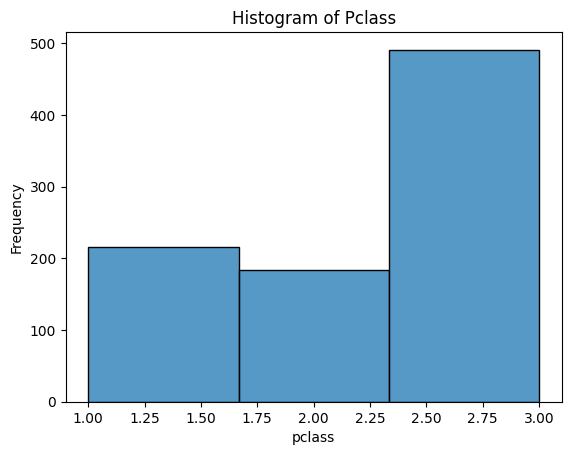

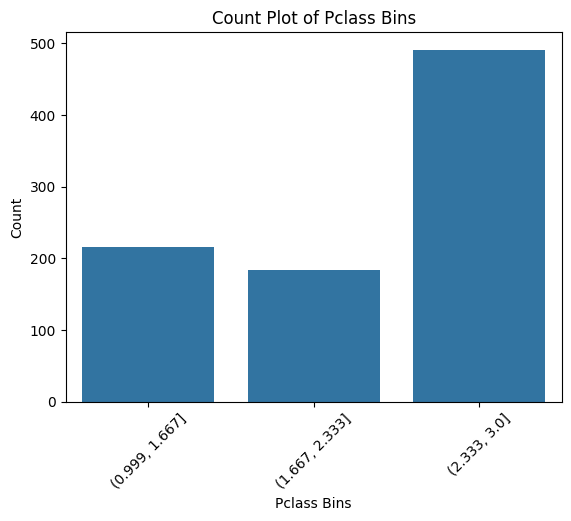

Unique values in age: 88


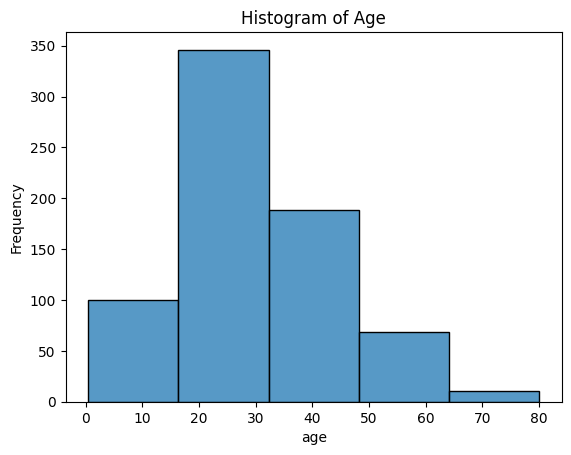

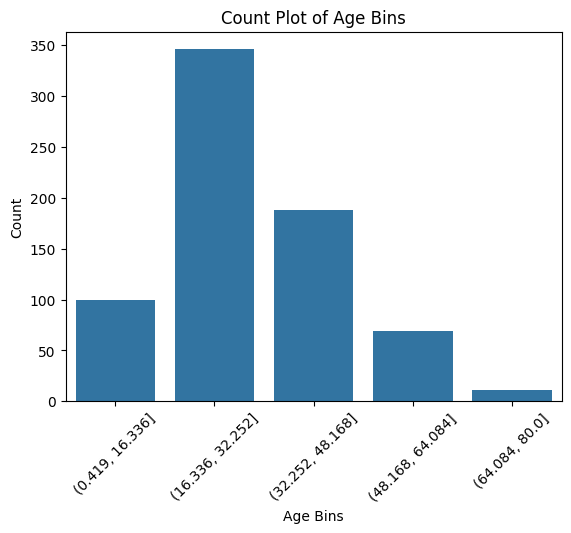

Unique values in sibsp: 7


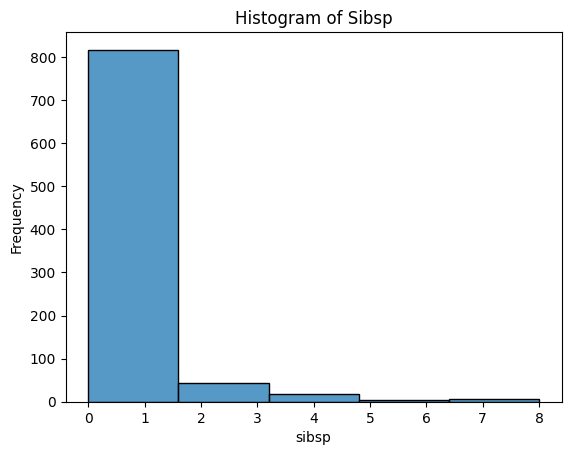

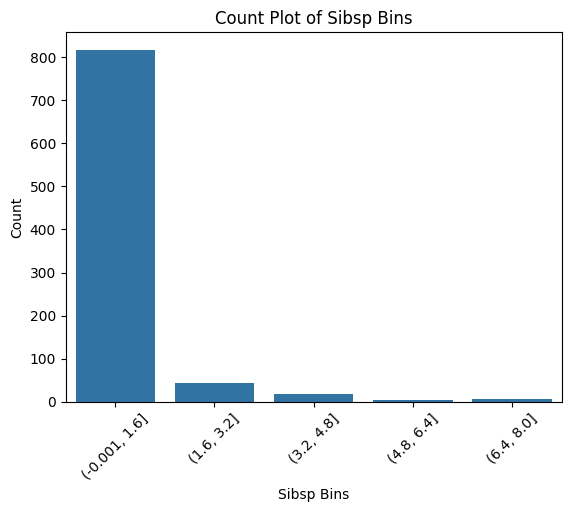

Unique values in parch: 7


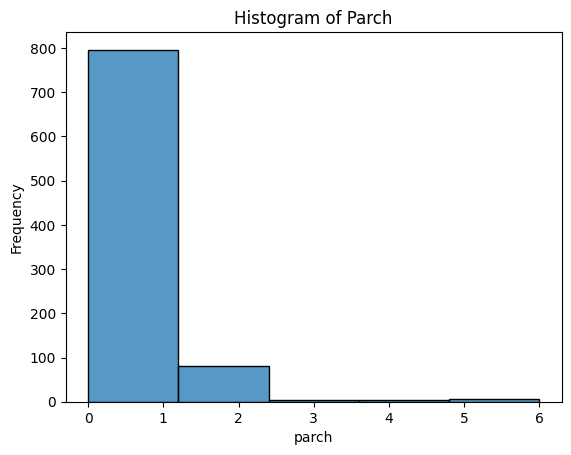

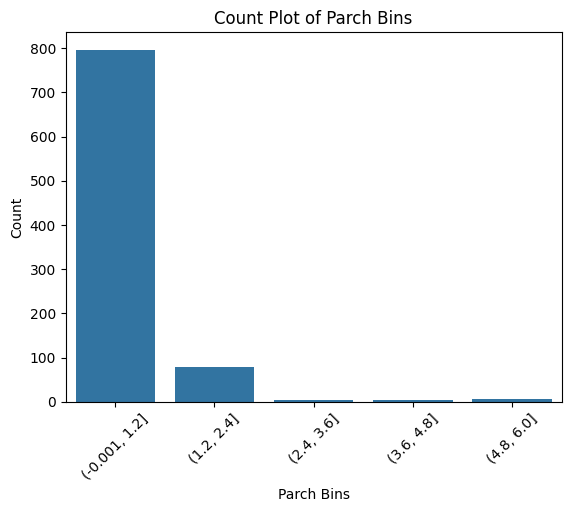

Unique values in fare: 248


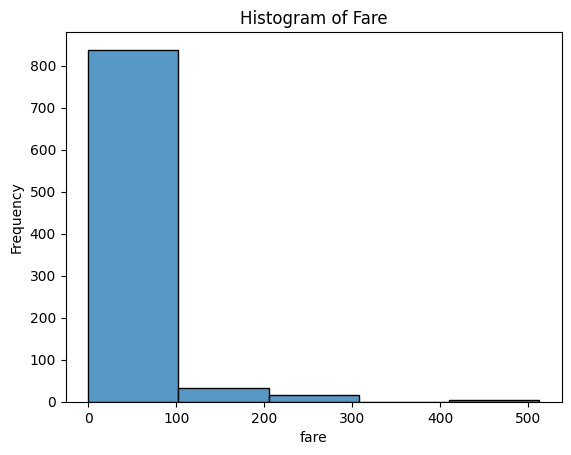

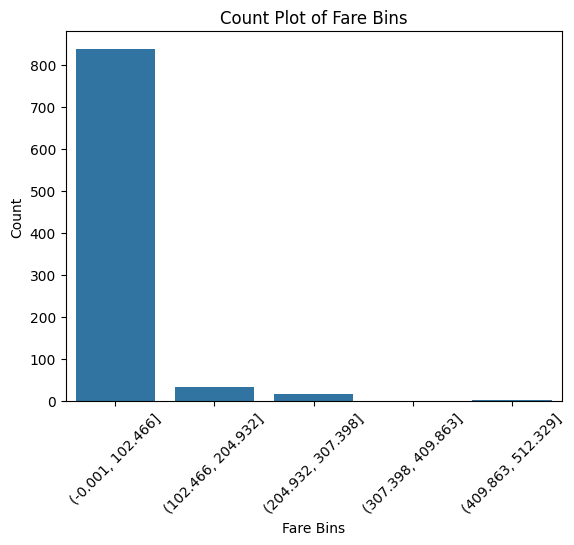

In [232]:
#Binning the data

# Loop through all numerical columns and apply handling
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    unique_values = df[column].nunique()
    print(f"Unique values in {column}: {unique_values}")

    # If it's a binary column (like 'survived'), create a count plot directly
    if unique_values <= 2:
        # Count plot for binary columns
        sns.countplot(data=df, x=column)
        plt.xlabel(f'{column.capitalize()}')
        plt.ylabel('Count')
        plt.title(f'Count Plot of {column.capitalize()}')
        plt.xticks(rotation=45)
        plt.show()
    else:
        # Create dynamic bins for continuous columns
        # Use min and max for creating bins while ensuring uniqueness
        min_value = df[column].min()
        max_value = df[column].max()
        num_bins = min(5, unique_values)  # Limit bins based on unique values

        # Create bins with a consistent range
        bins = np.linspace(min_value, max_value, num_bins + 1)
        
        # Create a new column for the binned data
        binned_column_name = f'{column}_binned'
        df[binned_column_name] = pd.cut(df[column], bins=bins, include_lowest=True, duplicates='drop')

        # Plot histogram
        sns.histplot(data=df, x=column, bins=bins, kde=False)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {column.capitalize()}')
        plt.show()

        # Plot count plot for the binned column
        sns.countplot(data=df, x=binned_column_name)
        plt.xlabel(f'{column.capitalize()} Bins')
        plt.ylabel('Count')
        plt.title(f'Count Plot of {column.capitalize()} Bins')
        plt.xticks(rotation=45)
        plt.show()

##### Observations

#### Initial Data Distribution for Categorical Columns

Value counts for column: sex
sex
male      577
female    314
Name: count, dtype: int64



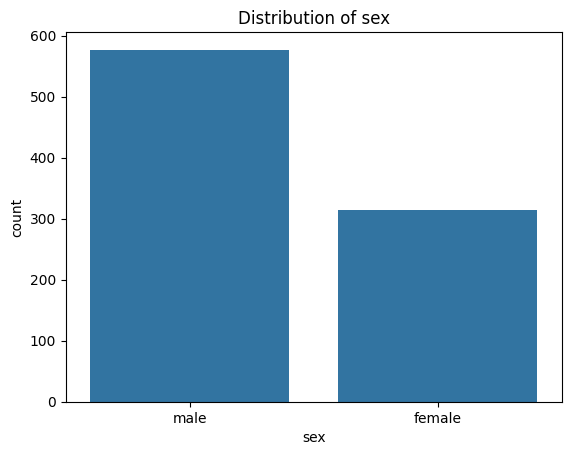

Value counts for column: embarked
embarked
S    644
C    168
Q     77
Name: count, dtype: int64



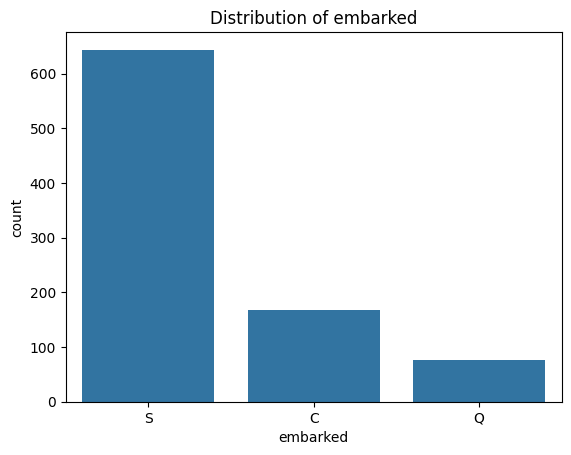

Value counts for column: class
class
Third     491
First     216
Second    184
Name: count, dtype: int64



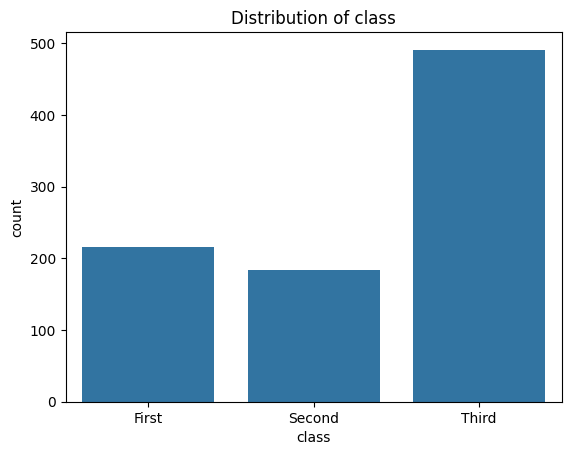

Value counts for column: who
who
man      537
woman    271
child     83
Name: count, dtype: int64



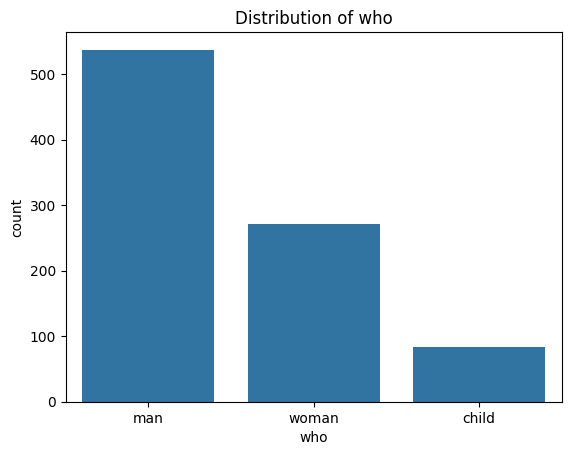

Value counts for column: deck
deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64



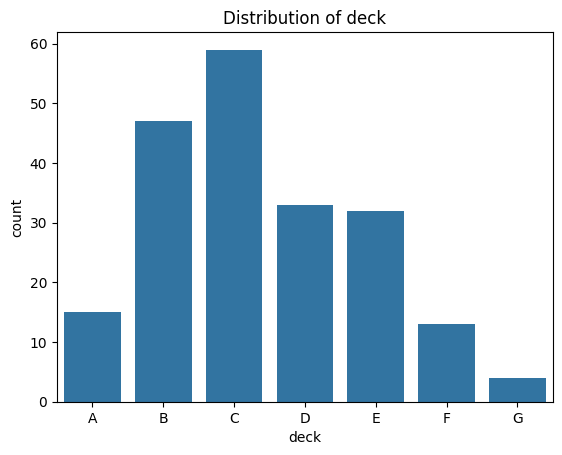

Value counts for column: embark_town
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64



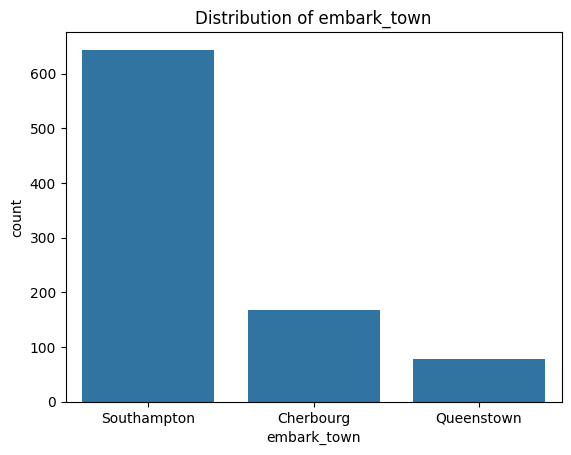

Value counts for column: alive
alive
no     549
yes    342
Name: count, dtype: int64



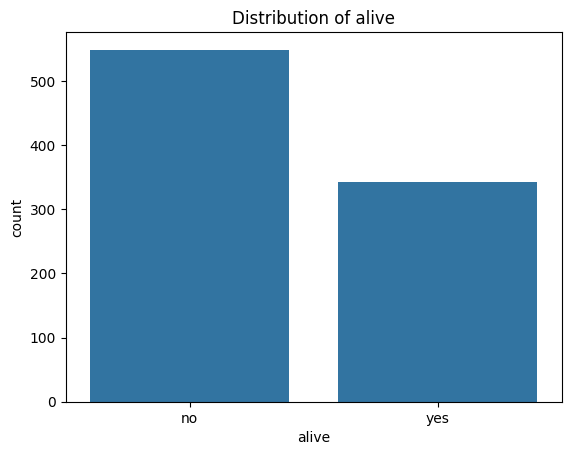

Value counts for column: pclass_binned
pclass_binned
(2.333, 3.0]      491
(0.999, 1.667]    216
(1.667, 2.333]    184
Name: count, dtype: int64



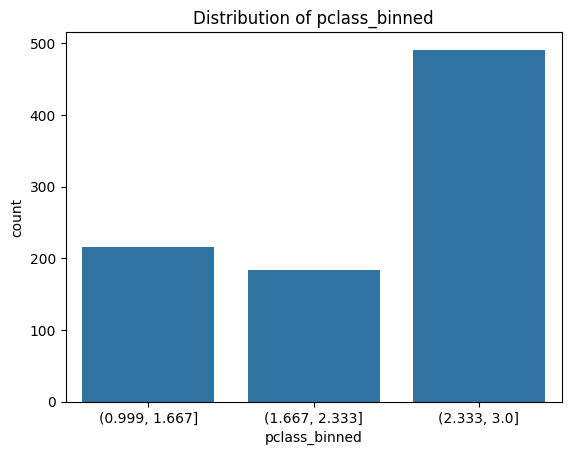

Value counts for column: age_binned
age_binned
(16.336, 32.252]    346
(32.252, 48.168]    188
(0.419, 16.336]     100
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: count, dtype: int64



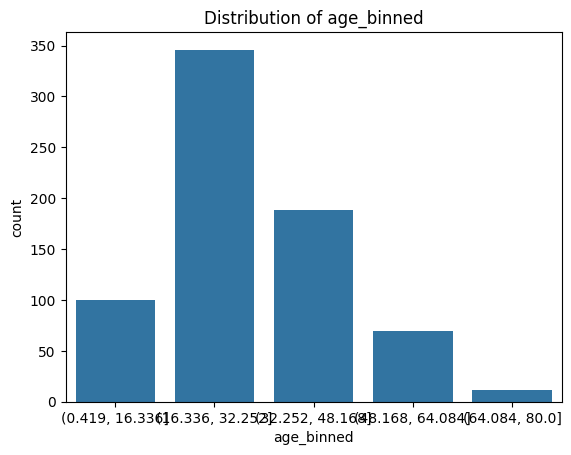

Value counts for column: sibsp_binned
sibsp_binned
(-0.001, 1.6]    817
(1.6, 3.2]        44
(3.2, 4.8]        18
(6.4, 8.0]         7
(4.8, 6.4]         5
Name: count, dtype: int64



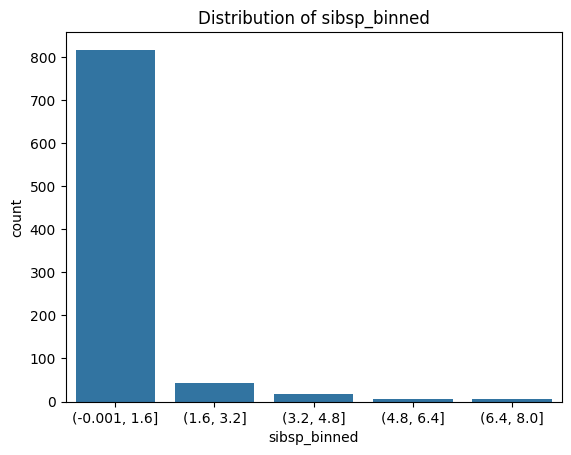

Value counts for column: parch_binned
parch_binned
(-0.001, 1.2]    796
(1.2, 2.4]        80
(4.8, 6.0]         6
(2.4, 3.6]         5
(3.6, 4.8]         4
Name: count, dtype: int64



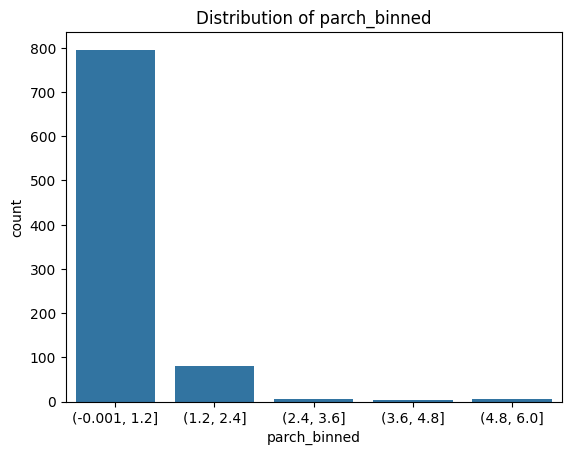

Value counts for column: fare_binned
fare_binned
(-0.001, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: count, dtype: int64



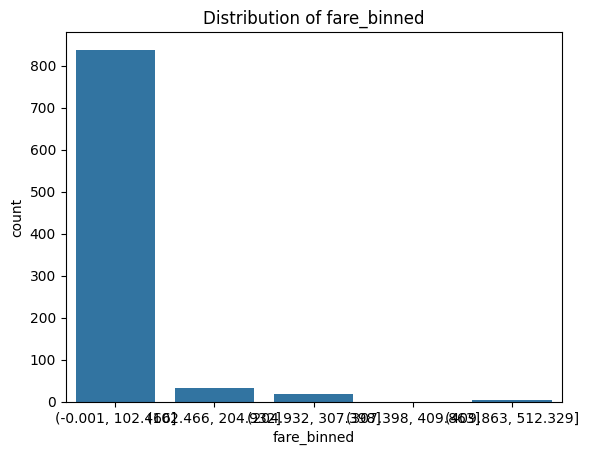

In [233]:
# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f'Value counts for column: {col}')
    print(df[col].value_counts())
    print()
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

##### Observations

#### Initial Data Transformation and Feature Engineering

In [234]:
# Define a dictionary mapping old column names to new names
new_column_names = {
    'pclass': 'Passenger Class',
    'sex': 'Gender',
    'age': 'Age',
    'sibsp': 'Siblings/Spouses Aboard',
    'parch': 'Parents/Children Aboard',
    'fare': 'Fare Amount',
    'survived': 'Survival Status'
}

# Rename the columns in the DataFrame using the dictionary
df.rename(columns=new_column_names, inplace=True)

# Display the updated DataFrame column names to verify the changes
print(df.columns)

# Adding new columns for family size and total fare
df['Family Size'] = df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard'] + 1  # Include the passenger
df['Fare Per Person'] = df['Fare Amount'] / df['Family Size']

# Display the first few rows of the updated DataFrame to verify the changes
print(df.head())

Index(['Survival Status', 'Passenger Class', 'Gender', 'Age',
       'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare Amount',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'pclass_binned', 'age_binned', 'sibsp_binned',
       'parch_binned', 'fare_binned'],
      dtype='object')
   Survival Status  Passenger Class  Gender   Age  Siblings/Spouses Aboard  \
0                0                3    male  22.0                        1   
1                1                1  female  38.0                        1   
2                1                3  female  26.0                        0   
3                1                1  female  35.0                        1   
4                0                3    male  35.0                        0   

   Parents/Children Aboard  Fare Amount embarked  class    who  ...  \
0                        0       7.2500        S  Third    man  ...   
1                        0      71.2833       

#### Initial Data Visualization

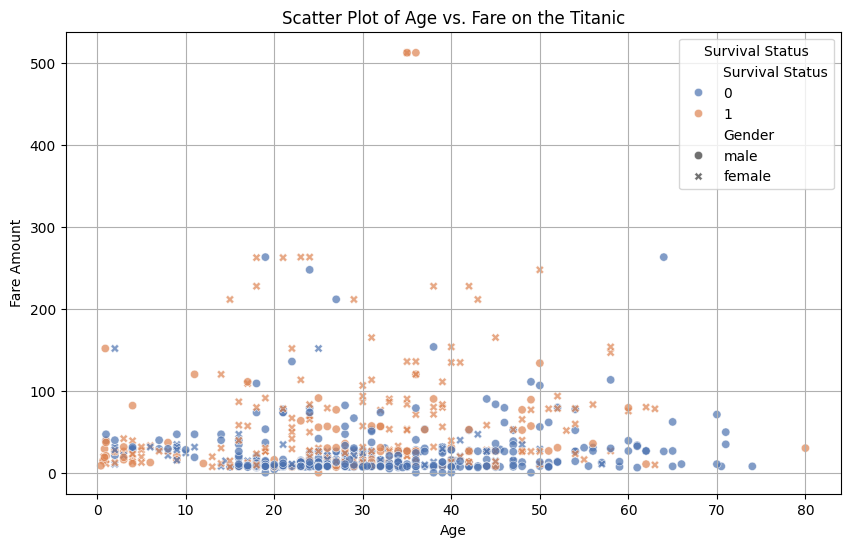

In [235]:
# Set up the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Fare Amount', hue='Survival Status', style='Gender', palette='deep', alpha=0.7)

# Customize the plot
plt.title('Scatter Plot of Age vs. Fare on the Titanic')
plt.xlabel('Age')
plt.ylabel('Fare Amount')
plt.legend(title='Survival Status')
plt.grid()

# Show the plot
plt.show()

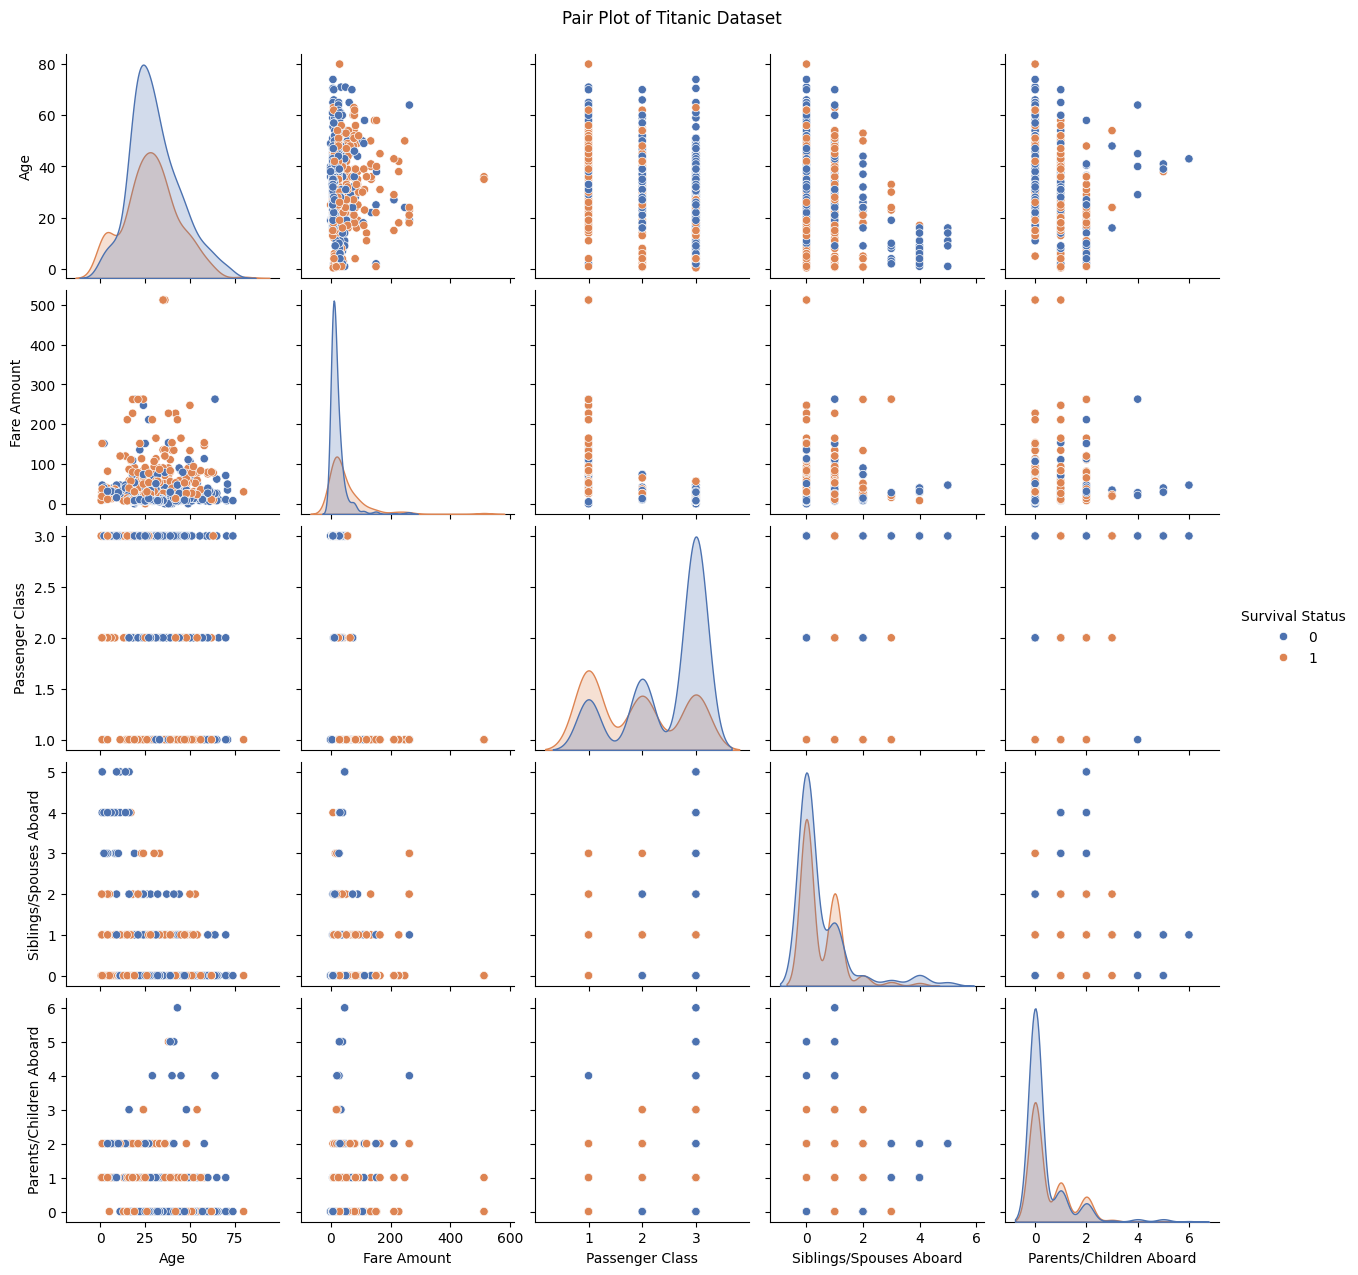

In [236]:
# Drop rows with missing values in relevant numeric columns
df = df.dropna(subset=['Age', 'Fare Amount', 'Passenger Class', 'Siblings/Spouses Aboard', 'Parents/Children Aboard'])

# Create a pair plot
sns.pairplot(df, hue='Survival Status', vars=['Age', 'Fare Amount', 'Passenger Class', 'Siblings/Spouses Aboard', 'Parents/Children Aboard'], palette='deep')

# Customize the plot
plt.suptitle('Pair Plot of Titanic Dataset', y=1.02)  # Adjust title position
plt.show()

##### Observations

#### Heatmap

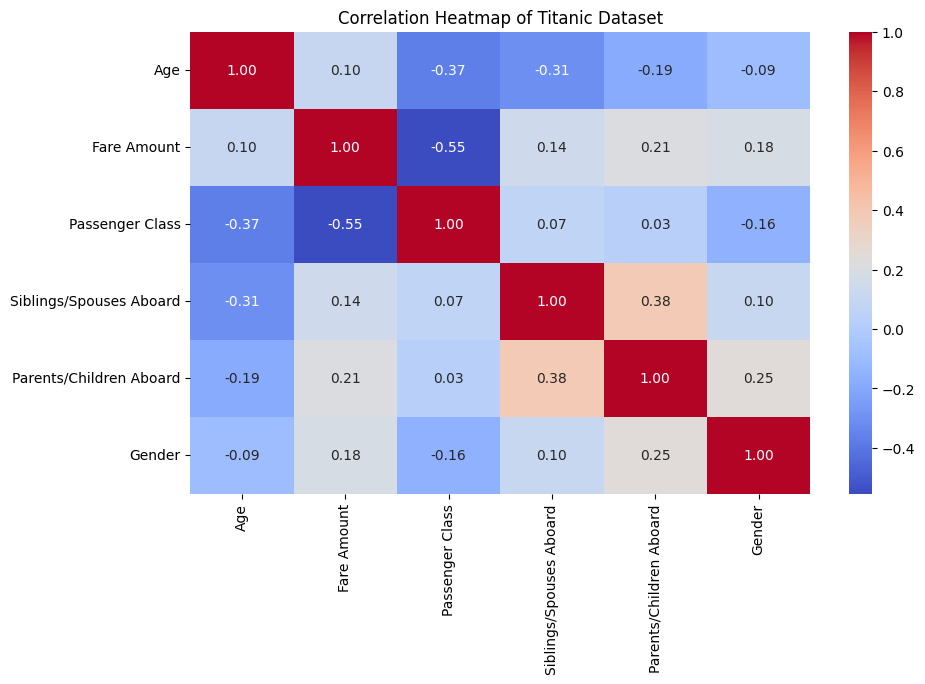

In [237]:
# Drop rows with missing values in numerical columns
df = df.dropna(subset=['Age', 'Fare Amount', 'Passenger Class', 'Siblings/Spouses Aboard', 'Parents/Children Aboard'])

# Convert categorical variables to numeric
df['Gender'] = df['Gender'].map({'male': 0, 'female': 1})  # Encoding Gender
df['Passenger Class'] = df['Passenger Class'].astype(float)  # Ensure Passenger Class is float for correlation

# Select numerical columns for correlation
numerical_cols = ['Age', 'Fare Amount', 'Passenger Class', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Gender']
correlation_matrix = df[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Titanic Dataset')
plt.show()